In [79]:
import numpy as np
import pandas as pd
from sympy import *
from scipy.misc import derivative
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm_notebook as tqdm


# 1

In [83]:

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


In [84]:
X=raitings

In [85]:
#A Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).
from  sklearn.metrics.pairwise import pairwise_distances

demo_data = raitings
pairwise_distances(demo_data, metric='cosine')


array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [86]:
LA.norm(raitings)

80.7031597894407

In [4]:
#B сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете
pca = PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [5]:
print(pca.explained_variance_ratio_)

[0.25373748 0.1970209  0.14113306 0.12956371 0.11289928]


In [6]:
print(pca.singular_values_)

[16.91716582 14.90704109 12.61681323 12.08862725 11.28446283]


In [7]:
X = raitings
svd = TruncatedSVD(n_components=5, n_iter=3, random_state=42)
svd.fit(X)

TruncatedSVD(n_components=5, n_iter=3, random_state=42)

In [8]:
print(svd.explained_variance_ratio_)

[0.07951819 0.22322522 0.19305559 0.14061375 0.12711606]


In [9]:
print(svd.explained_variance_ratio_.sum())

0.7635288023599804


In [10]:
print(svd.singular_values_)

[73.97894988 15.90026986 14.76407467 12.59396914 11.97537142]


# 2

In [11]:
#Вычислите производную tg^2(sin(x) + cos(2x+3)) в точке x=1 (на python и на бумаге).
def f(x):
    return tan (sin (x) + cos (2 * x + 3)) ** 2 
derivative(f, 1.0)


57.0653126946030

In [12]:
# import sympy
from sympy import *
  
# Use sympy.symbols() method
x, y = symbols('x y')
x = 1
gfg = tan (sin (x) + cos (2 * x + 3)) ** 2 
  
print(gfg)

tan(cos(5) + sin(1))**2


In [13]:
x = Symbol('x')


f = tan (sin (x) + cos (2 * x + 3)) ** 2
 
derivative_f =f.diff(x)
derivative_f

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [14]:
expn = tan (sin (x) + cos (2 * x + 3)) ** 2 

gfg = expn.evalf()
print(gfg)

tan(sin(x) + cos(2*x + 3))**2


In [15]:
import sympy as sym

x = sym.symbols("x")
x_values = np.linspace(-5, 5)

function = sym.lambdify(x, tan (sin (x) + cos (2 * x + 3)) ** 2, "numpy")
function(x_values)

array([4.89069277e+01, 6.32474019e+00, 5.09608116e+00, 1.52295318e+01,
       1.03002494e+02, 2.29748132e+00, 2.12155406e-01, 1.51617092e-02,
       4.78931712e-01, 2.05132869e+00, 5.17365442e+00, 6.03267225e+00,
       3.23611544e+00, 1.22670215e+00, 3.92281901e-01, 9.16850807e-02,
       9.03222746e-03, 1.13712903e-06, 8.94373804e-04, 3.05231655e-02,
       1.77032884e-01, 5.91751523e-01, 1.49866935e+00, 2.77846377e+00,
       2.93862895e+00, 1.56332656e+00, 4.48128448e-01, 2.27517552e-02,
       1.54992251e-01, 1.71493848e+00, 3.74695873e+01, 2.25676459e+01,
       5.47547054e+00, 5.64080110e+00, 2.68152462e+01, 2.65087391e+01,
       1.42245621e+00, 1.03539992e-01, 5.64103800e-02, 6.89809439e-01,
       2.61366659e+00, 5.76635095e+00, 5.56308321e+00, 2.67905798e+00,
       9.77420636e-01, 2.98713433e-01, 6.22638678e-02, 4.24759602e-03,
       1.00002537e-05, 2.65462077e-03])

In [16]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(10 * sin(2 * 𝑥 + 1) ** 4 * cos(2 * 𝑥 + 1), show=False)
p2 = plot(x, show=False)
p1.extend(p2)
p1

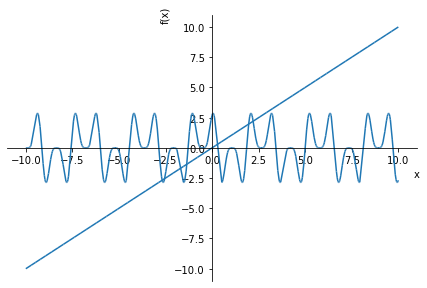

In [17]:
p1.show()

#Решение на бумаге

f(x)= (tg(sin(x)+cos(2x + 3))) ^ 2
(tg(sin(x) + cos (2x + 3)) ^ 2)՚ = 2 (tg (sin(x) +cos (2x + 3))) ^ 2-1
((tg(sin(x) + cos (2x + 3)))՚ = 2 (- 2 sin⁡(2x + 3) + cos⁡(x))/(cos⁡(sin⁡(X)+cos⁡(2x+3))  
((tg(sin(x) + cos (2x + 3)))՚ (sin(x) + cos(2x + 3))՚ = (-2*sin⁡(2x+3)+cos⁡(x))/(cos⁡(sin⁡(X)+cos⁡(2x+3)) ^ 2)
(sin(x) + cos(2*x +3))՚ = (cos(2x +3))՚ + (sin(X))՚ = (-2 * sin(2x +3)) + cos(x) = -2 * sin(2*x + 3) +cos(x)
cos(2x +3))՚ = (cos(2x+3))՚ * (2x+3)՚ = -2*sin(2x+3)
sin(2x+3)՚ = 2

#Ответ
   
2(-2 sin⁡(2x + 3) + cos⁡(x))/(cos⁡(sin⁡(X)+cos⁡(2x+3))                              
                                

# 3

In [19]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [20]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [21]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

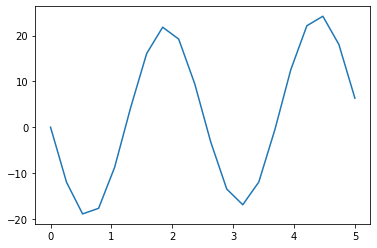

In [22]:
plt.plot(x, fx)
plt.show()

In [23]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [24]:
res = minimize (error, [2, 5], method = 'COBYLA', options={'xtol': 1e-6, 'disp': True})
res

C:\Users\kozlo\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:623: OptimizeWarning: Unknown solver options: xtol
  return _minimize_cobyla(fun, x0, args, constraints, **options)


     fun: 242.84016777994267
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 35
  status: 1
 success: True
       x: array([2.08279338, 5.05970416])

In [25]:
res = differential_evolution(error, [(-5, 5), (-5, 5)], disp=True)
res

differential_evolution step 1: f(x)= 232.486
differential_evolution step 2: f(x)= 194.814
differential_evolution step 3: f(x)= 194.814
differential_evolution step 4: f(x)= 194.814
differential_evolution step 5: f(x)= 50.8417
differential_evolution step 6: f(x)= 50.8417
differential_evolution step 7: f(x)= 50.8417
differential_evolution step 8: f(x)= 50.8417
differential_evolution step 9: f(x)= 50.8417
differential_evolution step 10: f(x)= 50.8417
differential_evolution step 11: f(x)= 50.8417
differential_evolution step 12: f(x)= 50.8417
differential_evolution step 13: f(x)= 25.5681
differential_evolution step 14: f(x)= 7.25529
differential_evolution step 15: f(x)= 7.25529
differential_evolution step 16: f(x)= 4.58911
differential_evolution step 17: f(x)= 4.58911
differential_evolution step 18: f(x)= 3.43082
differential_evolution step 19: f(x)= 1.32995
differential_evolution step 20: f(x)= 0.393021
differential_evolution step 21: f(x)= 0.393021
differential_evolution step 22: f(x)= 0.3

     fun: 1.5117754070814726e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

# 4

In [74]:
#Создайте собственную дискретную случайную величину с 20 значениями
a = np.random.randint(77, size = 20)
a

array([74, 36, 73, 34, 19, 22, 72,  5, 57, 52, 42,  7, 26, 43, 66, 61,  8,
       52, 33, 42])

In [75]:
#Сгенерируйте 1000 выборок размера 50
b = np.random.choice(1000,50)
b

array([992, 579, 325, 233, 263, 822, 468,  34, 935,  49, 287, 571, 667,
       585, 503,  29, 299, 826, 772, 839,  54, 644, 336, 443, 421, 747,
       673,  95, 603, 486, 757, 332, 515, 635, 247, 293, 286, 693, 916,
       406, 501, 849, 535, 458, 161,  84, 396, 930, 425, 768])

In [76]:
#Посчитайте среднее для каждой выборки
np.mean(b)

495.34

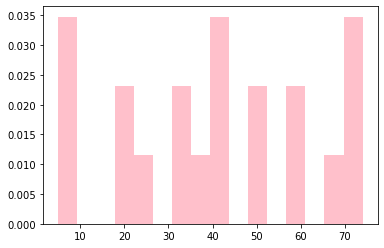

In [77]:
#Постройте гистограмму распределения средних
plt.hist(a, 16, density=True,color='Pink')
plt.show()

# 5

In [40]:
#Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [41]:
wm, vm = LA.eigh(m)
wm

array([0., 2.])

In [42]:
vm

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [43]:
np.dot(m, vm) - wm*vm

array([[2.12132034, 2.12132034],
       [0.        , 0.        ]])

# решение на листе
(-λ+1)*(-λ+1)-4*1=λ^2-2*λ-3
D=(-2)^2 - 4*1*(-3)=16
λ_1=-1
λ_2=3
#Для каждого λ найти его собственные вектора
λ_1=-1
A-λ_1*E=({{2, 4}, {1, 2}})
(A-λ*E)*v=0

*(1/2)
~({{1, 2, 0}, {1, 2, 0}})
*(-1)
~({{1, 2, 0}, {0, 0, 0}})

#ответ x_1=-2*x_2

λ_2=3
A-λ_2*E=({{-2, 4}, {1, -2}})

*((-1)/2)
~[L_1/(-2)->L_1]~({{1, -2, 0}, {1, -2, 0}})
*(-1)
~[L_2-1*L_1->L_2]~({{1, -2, 0}, {0, 0, 0}})
#ответ x_1=2*x_2